In [1]:
# Importing libraries

import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
# Reading songs data

combined_df = pd.read_csv('D:/Disseratation_data/combined_song_data.csv')

In [3]:
# Type casting Date and release_date column to date datatype

combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df['release_date'] = pd.to_datetime(combined_df['release_date'], format='ISO8601')

In [4]:
# Reading uk covid data

uk_covid = pd.read_csv('D:/Disseratation_data/uk_covid_data.csv')

In [5]:
# Subsetting data to select only the required columns

uk_covid = uk_covid[['date', 'new_cases', 
       'new_cases_per_million', 'new_deaths', 'new_deaths_per_million'
       ]]

In [6]:
# Typing date column to date datatype

uk_covid['date'] = pd.to_datetime(uk_covid['date'])

In [7]:
# Adding rows for time period ranging from 1s January 2019 to Januray 2st 2020 

date_range = pd.date_range(start="2019-01-01", end="2020-01-02")  
new_rows = pd.DataFrame({'date': date_range,
                         'new_cases': 0.0,
                         'new_cases_per_million': 0.0,
                         'new_deaths': 0.0,
                         'new_deaths_per_million': 0.0})


uk_covid = pd.concat([new_rows, uk_covid], ignore_index=True)


In [8]:
# Listing the columns in the dataframe

combined_df.columns

Index(['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank',
       'previous_rank', 'days_on_chart', 'streams', 'Date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'album_type', 'popularity', 'release_date'],
      dtype='object')

In [9]:
# First five rows of the dataframe

combined_df.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,Date,...,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,album_type,popularity,release_date
0,1,spotify:track:25sgk305KZfyuqVBQIahim,Ava Max,Sweet but Psycho,Atlantic Records,1,1,89,334456,2019-01-01,...,133.002,audio_features,25sgk305KZfyuqVBQIahim,https://api.spotify.com/v1/tracks/25sgk305KZfy...,https://api.spotify.com/v1/audio-analysis/25sg...,187436,4,single,3,2018-08-17
1,1,spotify:track:25sgk305KZfyuqVBQIahim,Ava Max,Sweet but Psycho,Atlantic Records,1,1,90,421463,2019-01-02,...,133.002,audio_features,25sgk305KZfyuqVBQIahim,https://api.spotify.com/v1/tracks/25sgk305KZfy...,https://api.spotify.com/v1/audio-analysis/25sg...,187436,4,single,3,2018-08-17
2,1,spotify:track:25sgk305KZfyuqVBQIahim,Ava Max,Sweet but Psycho,Atlantic Records,1,1,91,418099,2019-01-03,...,133.002,audio_features,25sgk305KZfyuqVBQIahim,https://api.spotify.com/v1/tracks/25sgk305KZfy...,https://api.spotify.com/v1/audio-analysis/25sg...,187436,4,single,3,2018-08-17
3,1,spotify:track:25sgk305KZfyuqVBQIahim,Ava Max,Sweet but Psycho,Atlantic Records,1,1,92,437177,2019-01-04,...,133.002,audio_features,25sgk305KZfyuqVBQIahim,https://api.spotify.com/v1/tracks/25sgk305KZfy...,https://api.spotify.com/v1/audio-analysis/25sg...,187436,4,single,3,2018-08-17
4,1,spotify:track:25sgk305KZfyuqVBQIahim,Ava Max,Sweet but Psycho,Atlantic Records,1,1,93,424643,2019-01-05,...,133.002,audio_features,25sgk305KZfyuqVBQIahim,https://api.spotify.com/v1/tracks/25sgk305KZfy...,https://api.spotify.com/v1/audio-analysis/25sg...,187436,4,single,3,2018-08-17


In [10]:
# Function to return the most frequent text phrase

def text_extract(x):
    return x.mode().iloc[0]

In [11]:
# Extracting unique songs and their values

song_properties_df = combined_df.groupby('uri').agg(
    artist_names = ('artist_names', text_extract),
    track_name = ('track_name', text_extract),
    source = ('source', text_extract),
    album_type = ('album_type', text_extract),
    release_date = ('release_date', text_extract),
    rank = ('rank', 'mean'),
    previous_rank = ('previous_rank', 'mean'),
    peak_rank = ('peak_rank', 'min'),
    streams = ('streams', 'mean'),
    danceability = ('danceability', 'mean'),
    energy = ('energy', 'mean'),
    key =  ('key', 'mean'),
    loudness =  ('loudness', 'mean'), 
    mode =  ('mode', 'mean'),
    speechiness =  ('speechiness', 'mean'),  
    acousticness =  ('acousticness', 'mean'),
    instrumentalness =  ('instrumentalness', 'mean'),
    liveness =  ('liveness', 'mean'),
    valence =  ('valence', 'mean'),
    tempo =  ('tempo', 'mean'),
    duration_ms =  ('duration_ms', 'mean'),
    time_signature =  ('time_signature', 'mean'),
    days_on_chart = ('days_on_chart', 'max')
).reset_index()

In [12]:
# Listing the columns of the new dataframe

song_properties_df.columns

Index(['uri', 'artist_names', 'track_name', 'source', 'album_type',
       'release_date', 'rank', 'previous_rank', 'peak_rank', 'streams',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'days_on_chart'],
      dtype='object')

In [13]:
# Setting the date of a song as the day it first reached it's peak rank

for i in song_properties_df['uri'].values:
    song_properties_df.loc[song_properties_df['uri'] == i, 'Date'] = combined_df.loc[
    (combined_df['uri'] == i) & 
    (combined_df['peak_rank'] == song_properties_df[song_properties_df['uri'] == i]['peak_rank'].iloc[0])
    ]['Date'].iloc[0]

In [14]:
# Creating a list of features to be used only for ml

selected_cols = ['rank', 'peak_rank',
       'previous_rank', 'days_on_chart', 'streams', 'Date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'album_type', 'release_date']

In [15]:
# Subsetting the dataframe with only the selected columns

selected_df = song_properties_df[selected_cols]

In [16]:
# Listing first five rows of the dataframe

selected_df.head()

,rank,peak_rank,previous_rank,days_on_chart,streams,Date,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,album_type,release_date
0,46.118721,9,45.960046,2187,118256.590183,2021-12-31,0.352,0.911,1.0,-5.230,...,0.0747,0.001210,0.000000,0.0995,0.236,148.033,222973.0,4.0,album,2004-01-01
1,91.666667,13,86.574074,108,88795.157407,2021-11-08,0.687,0.781,1.0,-4.806,...,0.0530,0.036100,0.000000,0.0755,0.688,97.014,193507.0,4.0,single,2021-11-05
2,121.000000,121,-1.000000,1,64078.000000,2020-09-18,0.681,0.773,5.0,-5.749,...,0.1480,0.019000,0.000001,0.1100,0.429,119.961,199008.0,4.0,single,2020-09-18
3,174.000000,109,-1.000000,2,56078.000000,2019-04-11,0.487,0.900,0.0,-4.417,...,0.0482,0.000068,0.000000,0.3580,0.484,149.937,204000.0,4.0,album,2002-06-04
4,168.000000,168,-1.000000,1,64190.000000,2020-10-30,0.600,0.887,0.0,-4.345,...,0.3110,0.043800,0.000000,0.6800,0.681,77.896,248811.0,4.0,album,2020-10-30


In [17]:
# Creating a new column nostalgia if the date and release date is more than three years apart

selected_df.loc[:, 'nostalgia'] = combined_df.apply(lambda row: 1 if (row['Date'] - row['release_date']).days > 1095 else 0, axis=1)

C:\Users\ajaym\AppData\Local\Temp\ipykernel_29992\1578599805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.loc[:, 'nostalgia'] = combined_df.apply(lambda row: 1 if (row['Date'] - row['release_date']).days > 1095 else 0, axis=1)


In [18]:
# Creating a new column lockdown to indicate if the song was popular before, during or after lockdown

selected_df.loc[:, 'lockdown'] = selected_df['Date'].apply(lambda date: 
    0 if date < pd.to_datetime('2020-03-26') else
    1 if (pd.to_datetime('2020-03-26') <= date <= pd.to_datetime('2021-08-03')) else
    2 if date > pd.to_datetime('2021-08-03') else
    -1
)

C:\Users\ajaym\AppData\Local\Temp\ipykernel_29992\3159164929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.loc[:, 'lockdown'] = selected_df['Date'].apply(lambda date:


In [19]:
# Merging song data and covid data on date

merged_df = pd.merge(uk_covid[['date', 'new_cases_per_million']], selected_df, left_on='date', right_on='Date', how='right')

In [20]:
# Generating correlation matrix and listing the top 10 strongest correlations

correlation_matrix = merged_df[['peak_rank', 'rank', 'previous_rank', 'streams', 'danceability', 'energy', 
       'loudness',  'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'days_on_chart','nostalgia', 'lockdown', 'new_cases_per_million' ]].corr()


most_correlated_features = set()  
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        if abs(correlation_value) >= 0.3:
            most_correlated_features.add((feature1, feature2, correlation_value))

most_correlated_features = list(most_correlated_features)
most_correlated_features.sort(key=lambda x: abs(x[2]), reverse=True)

for feature_pair in most_correlated_features:
    print(f"{feature_pair[0]} and {feature_pair[1]}: {feature_pair[2]}")

loudness and energy: 0.7390890242837366
rank and peak_rank: 0.7234227082676239
streams and rank: -0.6941432807809363
acousticness and energy: -0.6252020486909756
acousticness and loudness: -0.5326331029130393
new_cases_per_million and lockdown: 0.4837061124282533
streams and peak_rank: -0.4497114796512032
previous_rank and peak_rank: -0.4160362400545997
days_on_chart and peak_rank: -0.3715210596215462
valence and danceability: 0.36829966011272436
valence and energy: 0.34465179732526147


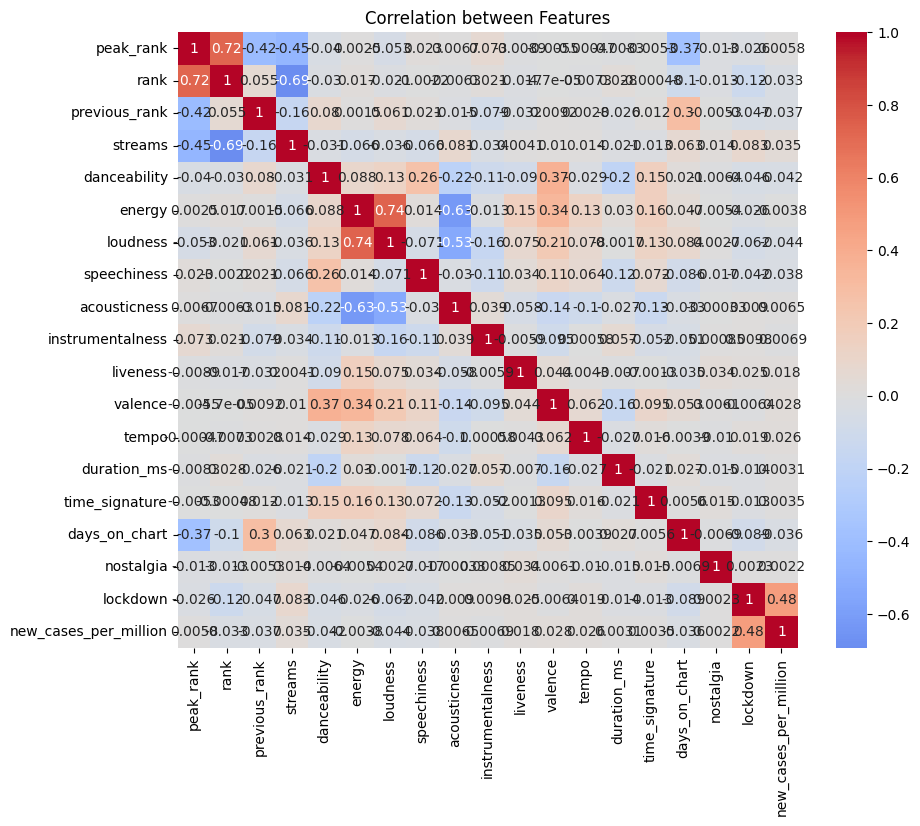

In [21]:
# Visualize correlation matrix as a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between Features")
plt.show()

In [22]:
# Performing Variance Inflation Factor test on rank and peak_rank

X = song_properties_df[['rank', 'peak_rank']]
X.loc[:, 'intercept'] = 1
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

    Variable        VIF
0       rank   2.097933
1  peak_rank   2.097933
2  intercept  10.131670


C:\Users\ajaym\AppData\Local\Temp\ipykernel_29992\507075479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'intercept'] = 1


In [23]:
# One-hot encoding categorical variables and performing train-test split

data1 = pd.get_dummies(merged_df, columns=['time_signature', 'key', 'mode', 'album_type'], drop_first=True)
X = data1.drop(columns=['nostalgia', 'lockdown', 'peak_rank', 'Date', 'release_date', 'previous_rank', 'rank', 'date', 'new_cases_per_million'])
y = data1['peak_rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Cross validation and model evaluation of Random Forest Regressor with only song properties

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

cross_val_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cross_val_scores)
r2_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='r2')
for i, (rmse, r2) in enumerate(zip(rmse_scores, r2_scores), 1):
    print(f"Fold {i}: RMSE = {rmse:.4f}, R-squared = {r2:.4f}")
mean_rmse = rmse_scores.mean()
mean_r2 = r2_scores.mean()
print(f"Mean RMSE = {mean_rmse:.4f}")
print(f"Mean R-squared = {mean_r2:.4f}")

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nRoot Mean Squared Error (Test): {rmse:.4f}")
print(f"R-squared (R2) Value (Test): {r2:.4f}")

feature_importances = model_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_n = 10
print(f"\nTop {top_n} Important Features for Random Forest Regressor:")
print(importance_df.head(top_n))


Fold 1: RMSE = 22.7978, R-squared = 0.8334
Fold 2: RMSE = 22.6446, R-squared = 0.8331
Fold 3: RMSE = 22.3386, R-squared = 0.8406
Fold 4: RMSE = 22.6603, R-squared = 0.8360
Fold 5: RMSE = 21.8118, R-squared = 0.8436
Mean RMSE = 22.4506
Mean R-squared = 0.8373

Root Mean Squared Error (Test): 23.3098
R-squared (R2) Value (Test): 0.8328

Top 10 Important Features for Random Forest Regressor:
          Feature  Importance
0   days_on_chart    0.551769
1         streams    0.312547
5     speechiness    0.015324
11    duration_ms    0.013459
3          energy    0.012872
9         valence    0.012853
2    danceability    0.012099
8        liveness    0.011778
6    acousticness    0.011481
10          tempo    0.011389


In [25]:
# One-hot encoding categorical variables and performing train-test split

data1 = pd.get_dummies(merged_df, columns=['nostalgia', 'lockdown','time_signature', 'key', 'mode', 'album_type'], drop_first=True)
X = data1.drop(columns=[ 'peak_rank', 'Date', 'release_date', 'previous_rank',  'rank', 'date'])
y = data1['peak_rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Cross validation and model evaluation of Random Forest Regressor with song properties and covid variables

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

cross_val_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cross_val_scores)
r2_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='r2')
for i, (rmse, r2) in enumerate(zip(rmse_scores, r2_scores), 1):
    print(f"Fold {i}: RMSE = {rmse:.4f}, R-squared = {r2:.4f}")
mean_rmse = rmse_scores.mean()
mean_r2 = r2_scores.mean()
print(f"Mean RMSE = {mean_rmse:.4f}")
print(f"Mean R-squared = {mean_r2:.4f}")

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nRoot Mean Squared Error (Test): {rmse:.4f}")
print(f"R-squared (R2) Value (Test): {r2:.4f}")

feature_importances = model_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_n = 10
print(f"\nTop {top_n} Important Features for Random Forest Regressor:")
print(importance_df.head(top_n))

Fold 1: RMSE = 22.3366, R-squared = 0.8401
Fold 2: RMSE = 21.5913, R-squared = 0.8482
Fold 3: RMSE = 21.6221, R-squared = 0.8506
Fold 4: RMSE = 21.2224, R-squared = 0.8562
Fold 5: RMSE = 21.0903, R-squared = 0.8538
Mean RMSE = 21.5725
Mean R-squared = 0.8498

Root Mean Squared Error (Test): 22.2666
R-squared (R2) Value (Test): 0.8474

Top 10 Important Features for Random Forest Regressor:
                  Feature  Importance
1           days_on_chart    0.551105
2                 streams    0.310392
0   new_cases_per_million    0.017135
6             speechiness    0.012622
12            duration_ms    0.011992
4                  energy    0.011477
10                valence    0.010518
3            danceability    0.010216
9                liveness    0.009884
7            acousticness    0.009840
